In [1]:
import re
import numpy as np
import pandas as pd
import numpy as np

In [3]:

def parse_latency(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if "L1I AVERAGE MISS LATENCY:" in line:
                # Extract the latency value
                latency = float(re.search(r'(\d+\.\d+) cycles', line).group(1))
                return latency
    return None

def parse_total(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("L1I TOTAL"):
                # Extract total, hit, and miss values
                match = re.search(r'ACCESS:\s+(\d+)\s+HIT:\s+(\d+)\s+MISS:\s+(\d+)', line)
                if match:
                    return tuple(map(int, match.groups()))
    return None

def parse_load(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("L1I LOAD"):
                # Extract load, hit, and miss values
                match = re.search(r'ACCESS:\s+(\d+)\s+HIT:\s+(\d+)\s+MISS:\s+(\d+)', line)
                if match:
                    return tuple(map(int, match.groups()))
    return None

def parse_rfo(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("L1I RFO"):
                match = re.search(r'ACCESS:\s+(\d+)\s+HIT:\s+(\d+)\s+MISS:\s+(\d+)', line)
                if match:
                    return tuple(map(int, match.groups()))
                
    return None

def parse_prefetch(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("L1I PREFETCH "):  # Extra space to avoid "REQUESTED" line
                # Extract prefetch, hit, and miss values
                match = re.search(r'ACCESS:\s+(\d+)\s+HIT:\s+(\d+)\s+MISS:\s+(\d+)', line)
                if match:
                    return tuple(map(int, match.groups()))
               
    return None

def parse_write(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("L1I WRITE"):
                # Extract write, hit, and miss values
                match = re.search(r'ACCESS:\s+(\d+)\s+HIT:\s+(\d+)\s+MISS:\s+(\d+)', line)
                if match:
                    return tuple(map(int, match.groups()))
    return None

def parse_pref_req(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("L1I PREFETCH  REQUESTED:"):
                # Extract prefetch requested value
                match = re.search(r'REQUESTED:\s+(\d+)\s+ISSUED:\s+(\d+)\s+USEFUL:\s+(\d+)\s+USELESS:\s+(\d+)', line)
                if match:
                    return tuple(map(int, match.groups()))
    return None

def parse_champsim_filename(filename):
    # Define the lists of valid replacements and prefetchers
    prefetchers = ['no_instr', 'eip', 'ip_stride', 'next_line_instr']
    replacements = ['lru', 'bip', 'drrip','lfu','fifo','belady']
    
    # Extract the trace number using regex
    trace_number_match = re.search(r'_(\d{3})_', filename)
    trace_number = trace_number_match.group(1) if trace_number_match else None

    # Extract the replacement policy from the filename
    replacement = next((r for r in replacements if r in filename), None)
    
    # Extract the prefetcher policy from the filename
    prefetcher = next((p for p in prefetchers if p in filename), None)
    
    # Return the extracted values as a tuple
    return (trace_number, replacement, prefetcher)

def parse_simulation_complete_ipc(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("Finished CPU 0"):
                # Extract the cumulative IPC value using regex
                ipc = float(re.search(r'cumulative IPC: (\d+\.\d+)', line).group(1))
                return ipc
    return None

def geometric_mean(series):
    # Convert series to a NumPy array to ensure compatibility
    series = np.array(series, dtype=np.float64)
    # Filter out zero values
    series = series[series > 0]
    # Calculate geometric mean if non-zero values exist, otherwise return 0
    if len(series) > 0:
        return np.exp(np.mean(np.log(series)))
    else:
        return 0


In [4]:
#create dataframes for each of latency, total, load, rfo, prefetch, write, prefetch request. Empty dataframes
filepath = "/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_022_fifo.txt"

df_latency = pd.DataFrame(columns = ['trace_num','replacement','avg_latency'])
df_total = pd.DataFrame(columns = ['trace_num','replacement','access','hit','miss'])
df_load = pd.DataFrame(columns = ['trace_num','replacement','access','hit','miss'])
# df_rfo = pd.DataFrame(columns = ['trace_num','replacement','prefetcher','access','hit','miss'])
df_prefetch = pd.DataFrame(columns = ['trace_num','replacement','access','hit','miss'])
# df_write = pd.DataFrame(columns = ['trace_num','replacement','prefetcher','access','hit','miss'])
df_pref_req = pd.DataFrame(columns = ['trace_num','replacement','requested','issued','useful','useless'])
df_ipc = pd.DataFrame(columns = ['trace_num','replacement','ipc'])



In [5]:
dir = "/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/"
import glob as glob
import os

files =  glob.glob(dir + "*.txt")
print(files)
print(len(files))

['/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_024_lfu.txt', '/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_028_lru.txt', '/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_028_fifo.txt', '/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_021_lru.txt', '/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_028_drrip.txt', '/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_024_bip.txt', '/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_028_bip.txt', '/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_022_drrip.txt', '/home/yashjonjale/Documents/CS683/fdip_champ_belady/ChampSim-master-BTBX/results_25M/server_022_fifo.txt', '/home/yashjonjale/Documents/C

In [6]:
total_instructions = 250000000
for file in files:
    trace_num, repl, pref = parse_champsim_filename(os.path.basename(file))
    print(trace_num, repl, pref)
    # input()
    result_latency = parse_latency(file)
    print(result_latency)
    df_latency = pd.concat([df_latency, pd.DataFrame({'trace_num':trace_num, 'replacement':repl, 'avg_latency':result_latency}, index=[0])], ignore_index=True)
    result_ipc = parse_simulation_complete_ipc(file)
    print(result_ipc)
    df_ipc = pd.concat([df_ipc, pd.DataFrame({'trace_num':trace_num, 'replacement':repl, 'ipc':result_ipc}, index=[0])], ignore_index=True)
    result_total = parse_total(file)
    print(result_total)
    df_total = pd.concat([df_total, pd.DataFrame({'trace_num':trace_num, 'replacement':repl, 'access':result_total[0], 'hit':result_total[1], 'miss':result_total[2]}, index=[0])], ignore_index=True)
    result_load = parse_load(file)
    print(result_load)
    df_load = pd.concat([df_load, pd.DataFrame({'trace_num':trace_num, 'replacement':repl, 'access':result_load[0], 'hit':result_load[1], 'miss':result_load[2]}, index=[0])], ignore_index=True)
    result_prefetch = parse_prefetch(file)
    print(result_prefetch)
    df_prefetch = pd.concat([df_prefetch, pd.DataFrame({'trace_num':trace_num, 'replacement':repl, 'access':result_prefetch[0], 'hit':result_prefetch[1], 'miss':result_prefetch[2]}, index=[0])], ignore_index=True)
    # result_pref_req = parse_pref_req(file)
    # print(result_pref_req)
    # df_pref_req = pd.concat([df_pref_req, pd.DataFrame({'trace_num':trace_num, 'replacement':repl, 'prefetcher':pref, 'requested':result_pref_req[0], 'issued':result_pref_req[1], 'useful':result_pref_req[2], 'useless':result_pref_req[3]}, index=[0])], ignore_index=True)
    

024 lfu None
37.9488
0.458195
(8887934, 5712763, 3175171)
(3722784, 2870448, 852336)
(5165150, 2842315, 2322835)
028 lru None
44.131
0.395377
(9499600, 6391066, 3108534)
(3780902, 2887180, 893722)
(5718698, 3503886, 2214812)
028 fifo None
43.808
0.394056
(9510445, 6342098, 3168347)
(3780755, 2855241, 925514)
(5729690, 3486857, 2242833)
021 lru None
36.8207
0.275191
(7064882, 5646765, 1418117)
(4673730, 3703453, 970277)
(2391152, 1943312, 447840)
028 drrip None
44.0955
0.394834
(9508226, 6381377, 3126849)
(3780927, 2879313, 901614)
(5727299, 3502064, 2225235)
024 bip None
42.842
0.45465
(8924217, 6248682, 2675535)
(3718827, 2933723, 785104)
(5205390, 3314959, 1890431)
028 bip None
44.0955
0.394834
(9508226, 6381377, 3126849)
(3780927, 2879313, 901614)
(5727299, 3502064, 2225235)
022 drrip None
36.1859
0.274874
(7086433, 5681102, 1405331)
(4688100, 3718887, 969213)
(2398333, 1962215, 436118)
022 fifo None
35.9618
0.274591
(7039149, 5541408, 1497741)
(4670752, 3640781, 1029971)
(2368397, 

In [7]:
df_ipc

,trace_num,replacement,ipc
0,024,lfu,0.458195
1,028,lru,0.395377
2,028,fifo,0.394056
3,021,lru,0.275191
4,028,drrip,0.394834
5,024,bip,0.454650
6,028,bip,0.394834
7,022,drrip,0.274874
8,022,fifo,0.274591
9,026,lru,0.434512


In [8]:
# save all the dataframes to csv files in the ./save directory
df_latency.to_csv("save/df_latency.csv", index=False)
df_total.to_csv("save/df_total.csv", index=False)
df_load.to_csv("save/df_load.csv", index=False)
df_prefetch.to_csv("save/df_prefetch.csv", index=False)
# df_pref_req.to_csv("save/df_pref_req.csv", index=False)
df_ipc.to_csv("save/df_ipc.csv", index=False)

In [9]:
df_latency_grouped = df_latency.groupby(['replacement']).agg({'avg_latency': ['mean', 'std']}).reset_index()
df_latency_grouped.columns = ['replacement', 'avg_latency_mean', 'avg_latency_std']
df_latency_grouped.to_csv("save/df_latency_grouped_am.csv", index=False)

df_latency_grouped_gm = df_latency.groupby(['replacement']).agg({'avg_latency': geometric_mean}).reset_index()
df_latency_grouped_gm.columns = ['replacement', 'avg_latency_gm']
df_latency_grouped_gm.to_csv("save/df_latency_grouped_gm.csv", index=False)

#add a mpki column to df_total dataframe
df_total['mpki'] = (df_total['miss']/total_instructions)*1000
df_load['mpki'] = (df_load['miss']/total_instructions)*1000
df_prefetch['mpki'] = (df_prefetch['miss']/total_instructions)*1000

df_total_grouped = df_total.groupby(['replacement']).agg({'access': 'sum', 'hit': 'sum', 'miss': 'sum', 'mpki': 'mean'}).reset_index()
df_total_grouped.to_csv("save/df_total_grouped.csv", index=False)
df_total_grouped_gm = df_total.groupby(['replacement']).agg({'mpki': geometric_mean}).reset_index()
df_total_grouped_gm.to_csv("save/df_total_grouped_gm.csv", index=False)

df_load_grouped = df_load.groupby(['replacement']).agg({'access': 'sum', 'hit': 'sum', 'miss': 'sum', 'mpki': 'mean'}).reset_index()
df_load_grouped.to_csv("save/df_load_grouped.csv", index=False)
df_load_grouped_gm = df_load.groupby(['replacement']).agg({'mpki': geometric_mean}).reset_index()
df_load_grouped_gm.to_csv("save/df_load_grouped_gm.csv", index=False)

df_prefetch_grouped = df_prefetch.groupby(['replacement']).agg({'access': 'sum', 'hit': 'sum', 'miss': 'sum', 'mpki': 'mean'}).reset_index()
df_prefetch_grouped.to_csv("save/df_prefetch_grouped.csv", index=False)
df_prefetch_grouped_gm = df_prefetch.groupby(['replacement']).agg({'mpki': geometric_mean}).reset_index()
df_prefetch_grouped_gm.to_csv("save/df_prefetch_grouped_gm.csv", index=False)

df_pref_req_grouped = df_pref_req.groupby(['replacement']).agg({'requested': 'sum', 'issued': 'sum', 'useful': 'sum', 'useless': 'sum'}).reset_index()
df_pref_req_grouped.to_csv("save/df_pref_req_grouped.csv", index=False)



In [10]:
df_latency_grouped_gm

,replacement,avg_latency_gm
0,belady,35.523951
1,bip,40.387841
2,drrip,40.387841
3,fifo,40.023618
4,lfu,35.494580
5,lru,40.435835


In [11]:
df_ipc_grouped = df_ipc.groupby(['replacement']).agg({'ipc': ['mean', 'std']}).reset_index()
df_ipc_grouped.columns = ['replacement', 'ipc_mean', 'ipc_std']
df_ipc_grouped.to_csv("save/df_ipc_grouped.csv", index=False)
df_ipc_grouped

df_ipc_grouped_gm = df_ipc.groupby(['replacement']).agg({'ipc': geometric_mean}).reset_index()
df_ipc_grouped_gm.columns = ['replacement', 'ipc_gm']
df_ipc_grouped_gm.to_csv("save/df_ipc_grouped_gm.csv", index=False)
df_ipc_grouped_gm

,replacement,ipc_gm
0,belady,0.359182
1,bip,0.358229
2,drrip,0.358229
3,fifo,0.357852
4,lfu,0.360381
5,lru,0.358384


In [12]:
df_total_grouped_gm


,replacement,mpki
0,belady,9.878948
1,bip,8.648577
2,drrip,8.648577
3,fifo,8.954798
4,lfu,9.876856
5,lru,8.686544


In [13]:
df_load_grouped_gm

,replacement,mpki
0,belady,3.682859
1,bip,3.551511
2,drrip,3.551511
3,fifo,3.703350
4,lfu,3.678767
5,lru,3.555316


In [14]:
#create a speedup dataframe
df_speedup = pd.DataFrame(columns = ['trace_num','replacement','speedup'])
#speedup will be calculated as the ratio of ipc of the current configuration to the ipc of the lru_(prefetcher) configuration for every replacement policy, prefetcher, trace number combination

#iterate over df_ipc dataframe and calculate speedup
for index, row in df_ipc.iterrows():
    trace_num = row['trace_num']
    replacement = row['replacement']
    # prefetcher = row['prefetcher']
    ipc = row['ipc']
    lru_ipc = df_ipc[(df_ipc['trace_num'] == trace_num) & (df_ipc['replacement'] == 'lru')]['ipc'].values[0]
    # print(trace_num, replacement, prefetcher, ipc, lru_ipc)
    speedup = ipc/lru_ipc
    # print(speedup)
    df_speedup = pd.concat([df_speedup, pd.DataFrame({'trace_num':trace_num, 'replacement':replacement, 'speedup':speedup}, index=[0])], ignore_index=True)


In [15]:
df_speedup_grouped = df_speedup.groupby(['replacement']).agg({'speedup': ['mean', 'std']}).reset_index()
df_speedup_grouped.columns = ['replacement', 'speedup_mean', 'speedup_std']
df_speedup_grouped.to_csv("save/df_speedup_grouped.csv", index=False)

df_speedup_grouped_gm = df_speedup.groupby(['replacement']).agg({'speedup': geometric_mean}).reset_index()
df_speedup_grouped_gm.columns = ['replacement', 'speedup_gm']
df_speedup_grouped_gm.to_csv("save/df_speedup_grouped_gm.csv", index=False)

df_speedup.to_csv("save/df_speedup.csv", index=False)


In [16]:
df_speedup_grouped_gm

,replacement,speedup_gm
0,belady,1.002227
1,bip,0.999567
2,drrip,0.999567
3,fifo,0.998514
4,lfu,1.005572
5,lru,1.000000


In [17]:
# drop the row with replacement = bip from df_speedup_grouped_gm, df_load_grouped_gm, df_total_grouped_gm, df_latency_grouped_gm
df_speedup_grouped_gm = df_speedup_grouped_gm[df_speedup_grouped_gm.replacement != 'bip']
df_speedup_grouped_gm = df_speedup_grouped_gm[df_speedup_grouped_gm.replacement != 'lru']
df_load_grouped_gm = df_load_grouped_gm[df_load_grouped_gm.replacement != 'bip']
df_total_grouped_gm = df_total_grouped_gm[df_total_grouped_gm.replacement != 'bip']
df_latency_grouped_gm = df_latency_grouped_gm[df_latency_grouped_gm.replacement != 'bip']


In [18]:
df_speedup_grouped_gm

,replacement,speedup_gm
0,belady,1.002227
2,drrip,0.999567
3,fifo,0.998514
4,lfu,1.005572


/tmp/ipykernel_921572/2841075943.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="replacement", y="speedup_gm", data=df_speedup_grouped_gm, palette="coolwarm")
/tmp/ipykernel_921572/2841075943.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="replacement", y="mpki", data=df_load_grouped_gm, palette="coolwarm")
/tmp/ipykernel_921572/2841075943.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="replacement", y="mpki", data=df_total_grouped_gm, palette="coolwarm")
/tmp/ipykernel_921572/2841075943.py:46: FutureWa

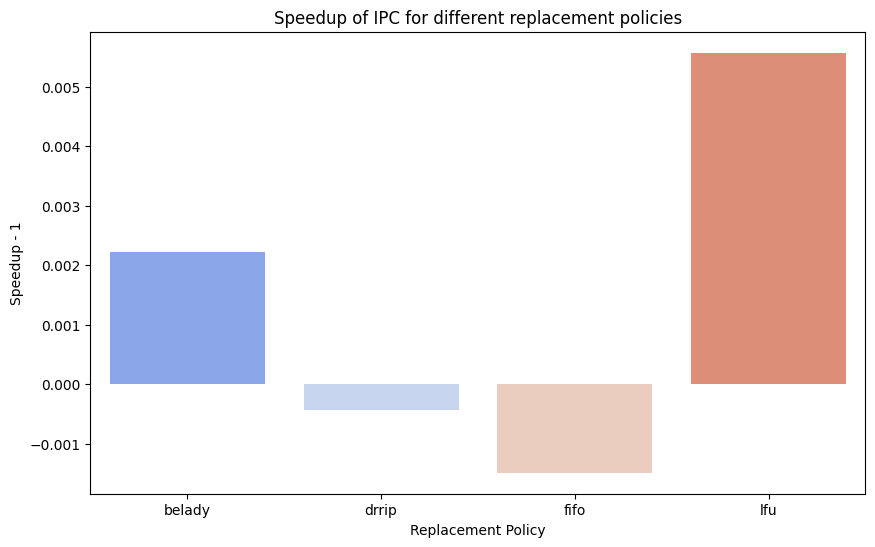

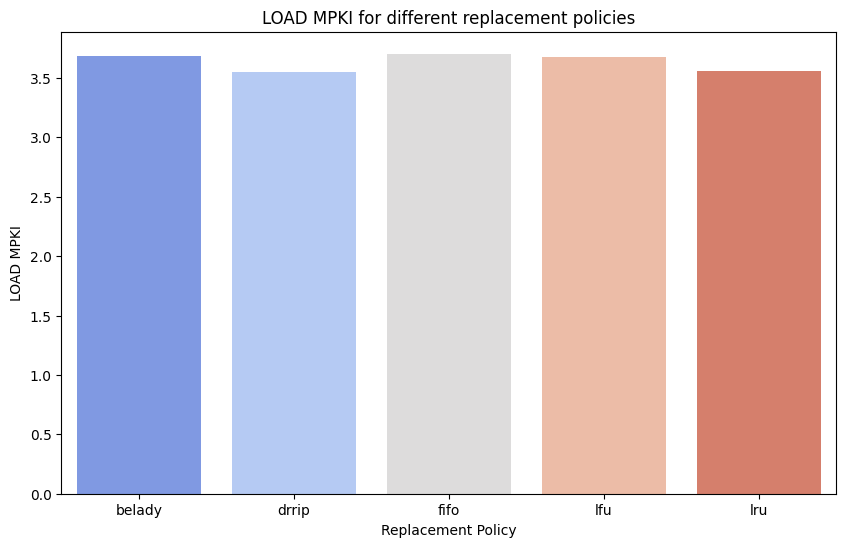

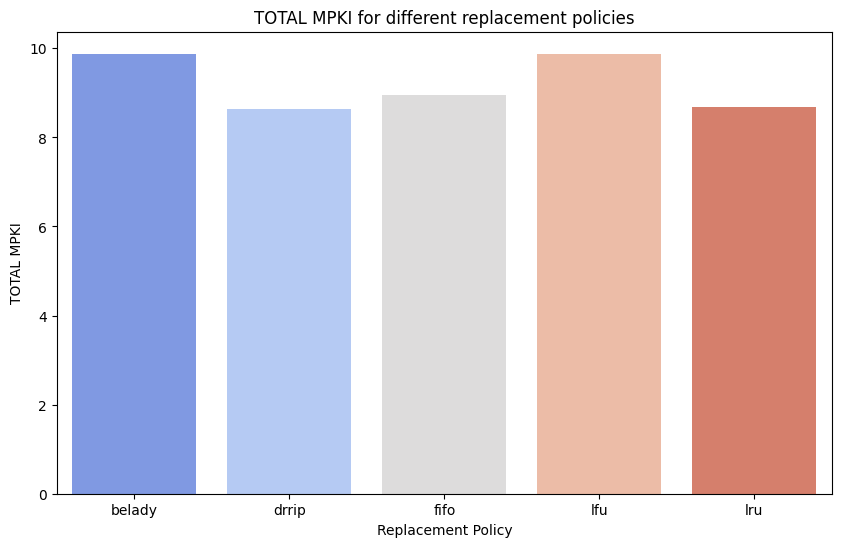

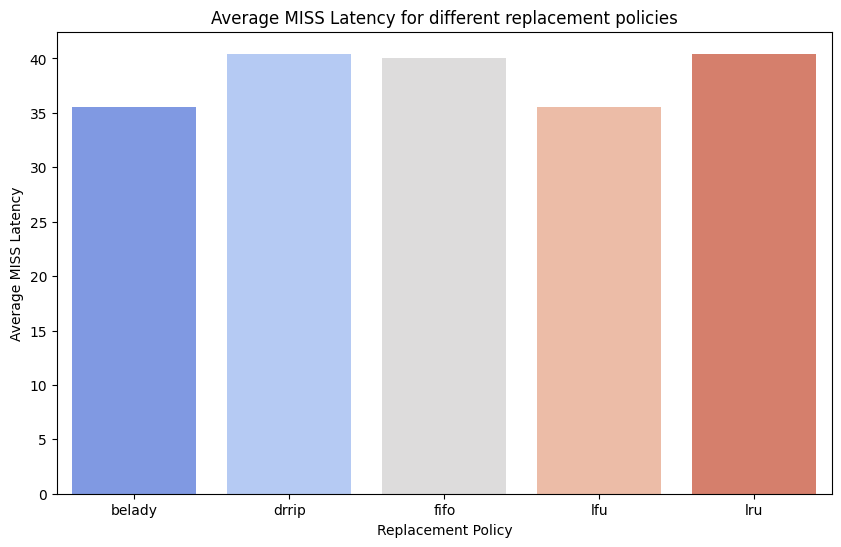

In [19]:
#make sns bar plot for speedup
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(x="replacement", y="speedup_gm", data=df_speedup_grouped_gm, errorbar='sd')
# plt.title("Speedup of IPC for different replacement policies")
# plt.xlabel("Replacement Policy")
# plt.ylabel("Speedup")
# plt.savefig("save/speedup.png")
# plt.show()

#shift the speedup_gm values by 1 and then make the plot above and below 1
df_speedup_grouped_gm['speedup_gm'] = df_speedup_grouped_gm['speedup_gm'] - 1

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="replacement", y="speedup_gm", data=df_speedup_grouped_gm, palette="coolwarm")
plt.title("Speedup of IPC for different replacement policies")
plt.xlabel("Replacement Policy")
plt.ylabel("Speedup - 1")
plt.savefig("save/speedup.png")
# plt.savefig("save/speedup.png")


#Without making any shifts make a bar plot for load mpki vs replacement policy
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="replacement", y="mpki", data=df_load_grouped_gm, palette="coolwarm")
plt.title("LOAD MPKI for different replacement policies")
plt.xlabel("Replacement Policy")
plt.ylabel("LOAD MPKI")
plt.savefig("save/load_mpki.png")

# do the same for total mpki

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="replacement", y="mpki", data=df_total_grouped_gm, palette="coolwarm")
plt.title("TOTAL MPKI for different replacement policies")
plt.xlabel("Replacement Policy")
plt.ylabel("TOTAL MPKI")
plt.savefig("save/total_mpki.png")

# do the same for average latency

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="replacement", y="avg_latency_gm", data=df_latency_grouped_gm, palette="coolwarm")
plt.title("Average MISS Latency for different replacement policies")
plt.xlabel("Replacement Policy")
plt.ylabel("Average MISS Latency")
plt.savefig("save/avg_latency.png")



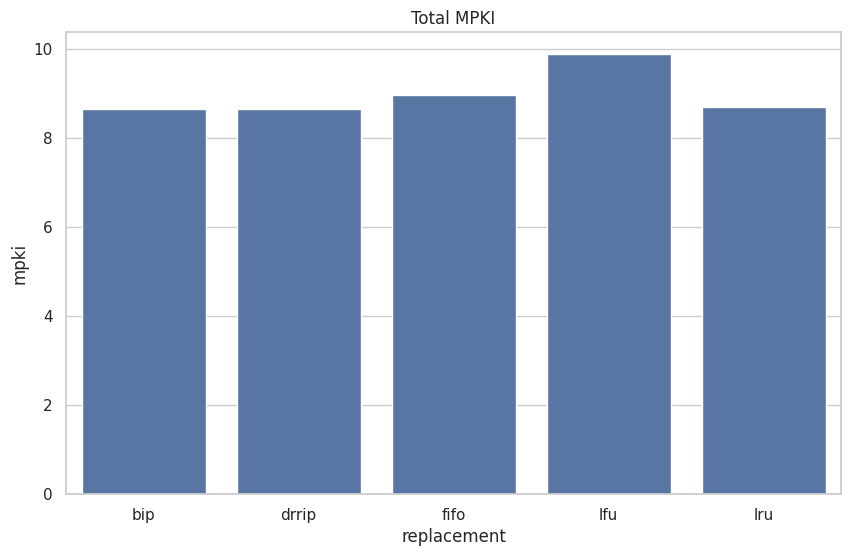

In [70]:
#make sns bar plots for total mpki
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x="replacement", y="mpki", data=df_total_grouped_gm)
plt.title("Total MPKI")
plt.savefig("save/total_mpki.png")


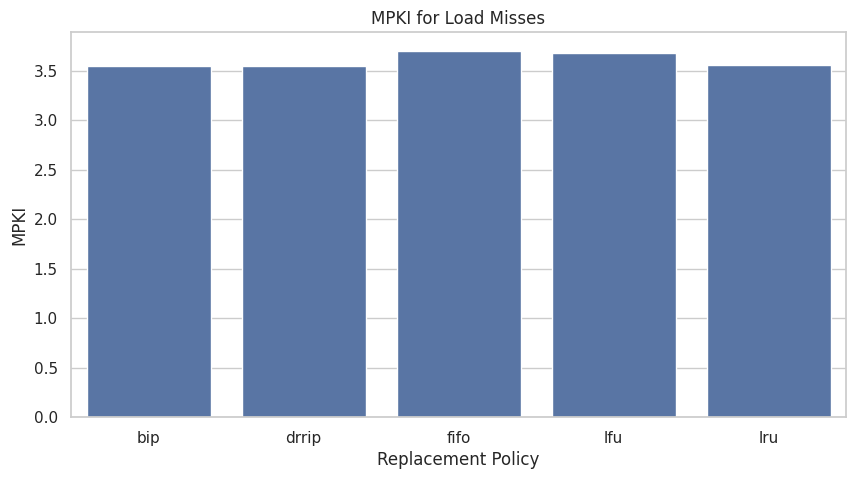

In [71]:
#make the bar plot for load mpkis
import matplotlib.pyplot as plt
import seaborn as sns

df_load_grouped = df_load_grouped.sort_values(by='mpki', ascending=False)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='replacement', y='mpki', data=df_load_grouped_gm)
ax.set_title('MPKI for Load Misses')
ax.set_xlabel('Replacement Policy')
ax.set_ylabel('MPKI')
plt.savefig("plots/load_mpki.png")
plt.show()

In [65]:
df_speedup_grouped_gm

,replacement,speedup_gm
0,bip,0.999567
1,drrip,0.999567
2,fifo,0.998514
3,lfu,1.005572
4,lru,1.000000


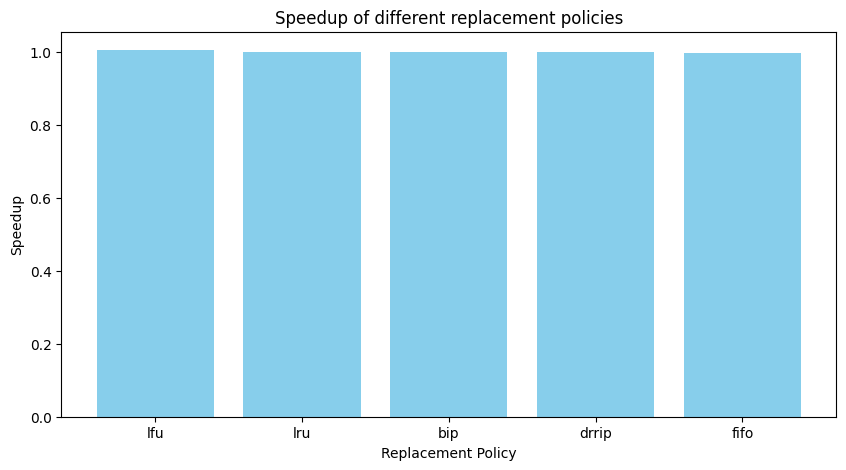

In [66]:
#make the plots
import matplotlib.pyplot as plt

#make a bar plot for speedups against replacement policies
df_speedup_grouped_gm = df_speedup_grouped_gm.sort_values(by='speedup_gm', ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_speedup_grouped_gm['replacement'], df_speedup_grouped_gm['speedup_gm'], color='skyblue')
plt.xlabel('Replacement Policy')
plt.ylabel('Speedup')
plt.title('Speedup of different replacement policies')
plt.savefig("save/speedup.png")
plt.show()

In [55]:
df_ipc_trace = df_ipc[df_ipc['trace_num'] == '021']
df_ipc_trace

,trace_num,replacement,prefetcher,ipc
14,021,drrip,no_instr,0.5690
15,021,lru,eip,0.5791
22,021,lfu,no_instr,0.5687
24,021,bip,next_line_instr,0.5655
28,021,drrip,ip_stride,0.5690
33,021,drrip,next_line_instr,0.5677
35,021,bip,eip,0.5785
41,021,lfu,eip,0.5834
42,021,lfu,next_line_instr,0.5677
48,021,drrip,eip,0.5824


In [67]:
def plot_2d_bar(data, value_column, std_dev_column=None, title=None):
    """
    Plots a 2D bar chart for a specified value across different prefetchers,
    with optional visualization of standard deviation as error bars.

    Parameters:
    - data (dict): Dictionary containing 'prefetcher', the specified value column, and optionally a std deviation column.
    - value_column (str): The name of the column in the data dictionary to use as the height of the bars.
    - std_dev_column (str, optional): The name of the column in the data dictionary representing standard deviation.
                                      If None, no error bars will be shown.
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Create DataFrame
    df = pd.DataFrame(data)

    # Plot
    fig, ax = plt.subplots()

    # Plotting
    x = df["replacement"]  # X-axis: Prefetchers
    y = df[value_column]
    yerr = df[std_dev_column] if std_dev_column else None  # Optional error bars
    if yerr is not None:
        ax.bar(x, y, yerr=yerr, capsize=5, alpha=0.7, color="skyblue", edgecolor="black")
    else:
        ax.bar(x, y, alpha=0.7, color="skyblue", edgecolor="black")
    # Setting labels
    ax.set_xlabel("Replacement Policy")
    ax.set_ylabel(value_column.replace("_", " ").title())
    ax.set_title(title)

    plt.savefig(f"save/{title}.png")




In [58]:
df_speedup_grouped_gm

,replacement,prefetcher,speedup_gm
0,bip,eip,0.999238
1,bip,ip_stride,1.001155
2,bip,next_line_instr,1.000450
3,bip,no_instr,1.001155
4,drrip,eip,0.945291
5,drrip,ip_stride,1.023894
6,drrip,next_line_instr,1.013603
7,drrip,no_instr,1.023894
8,lfu,eip,0.954221
9,lfu,ip_stride,1.019589


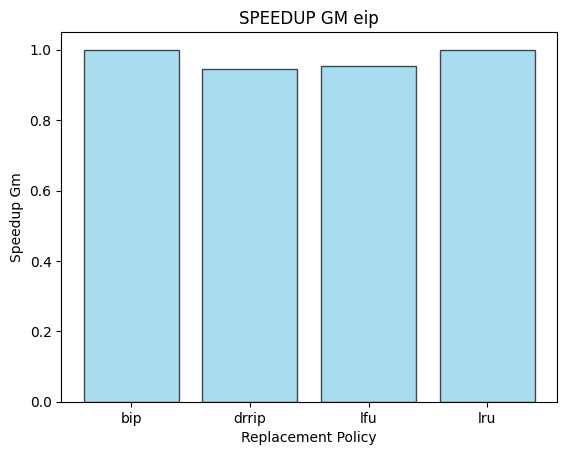

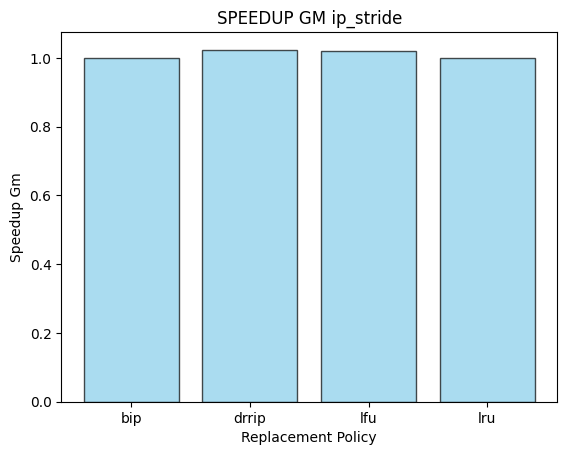

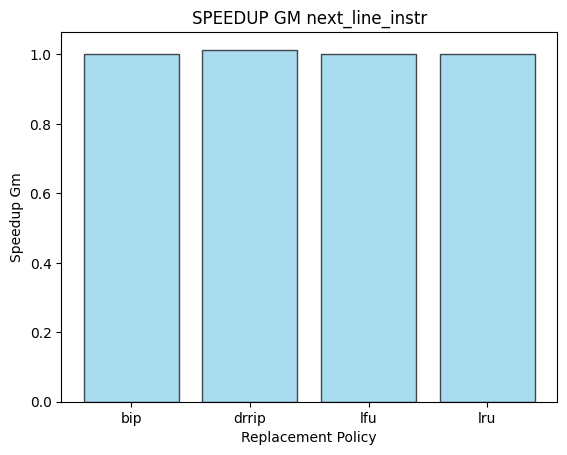

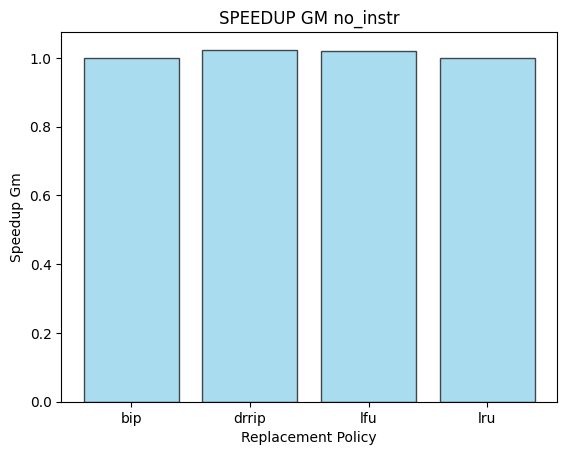

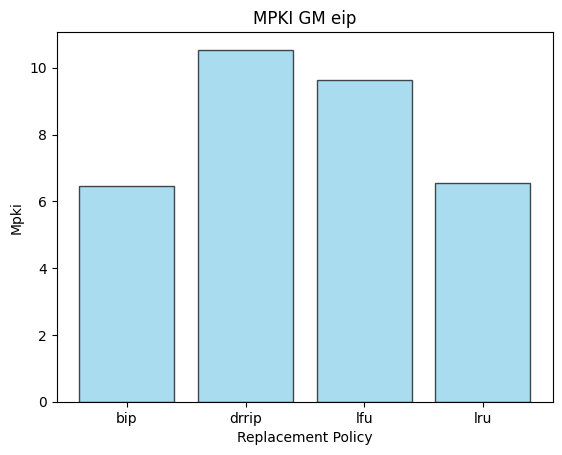

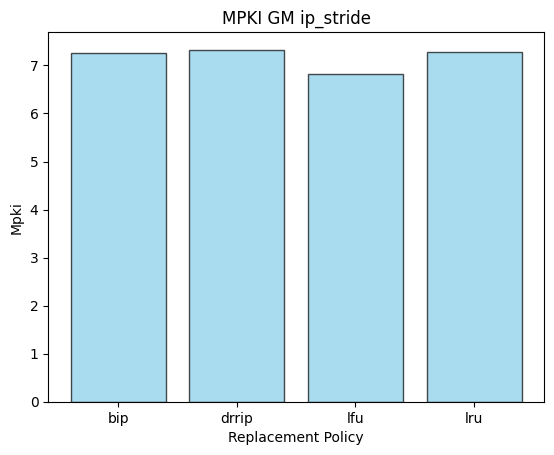

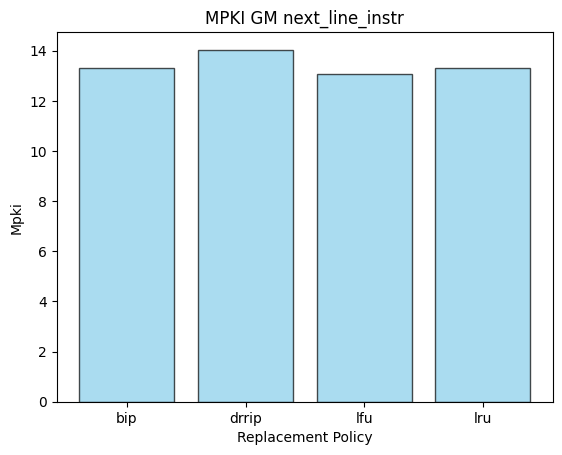

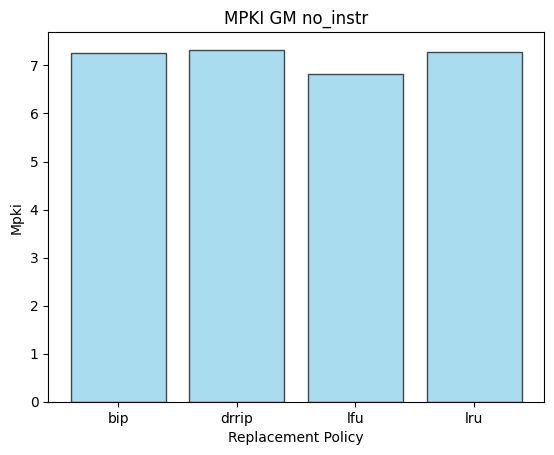

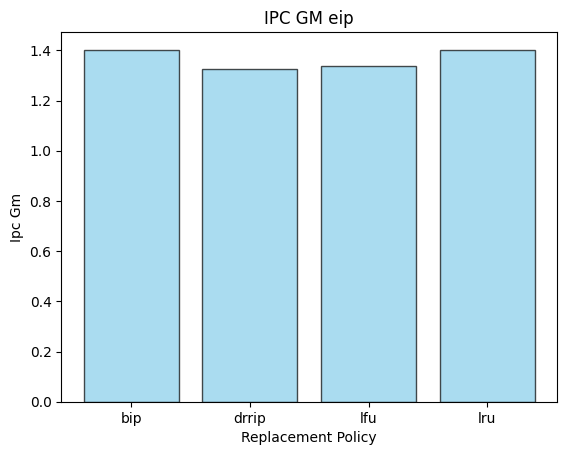

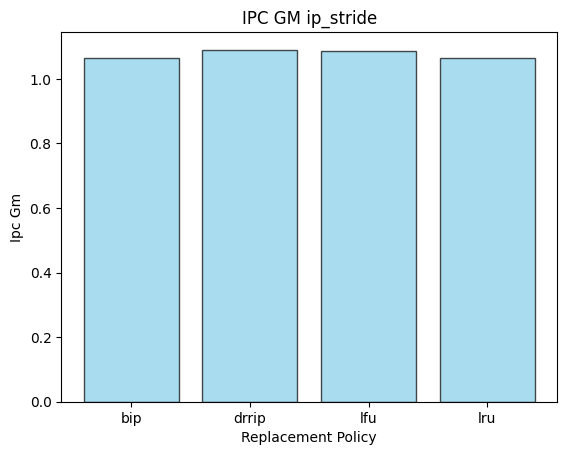

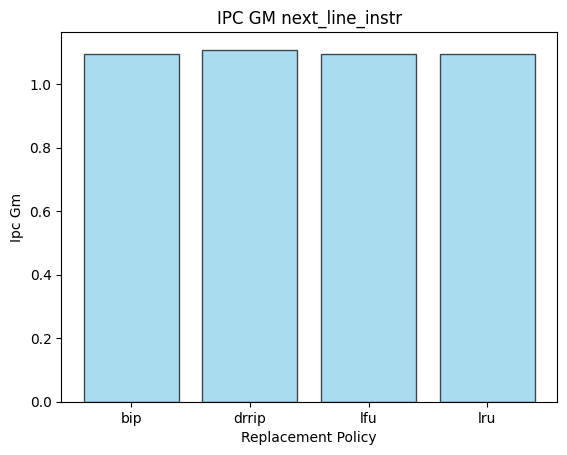

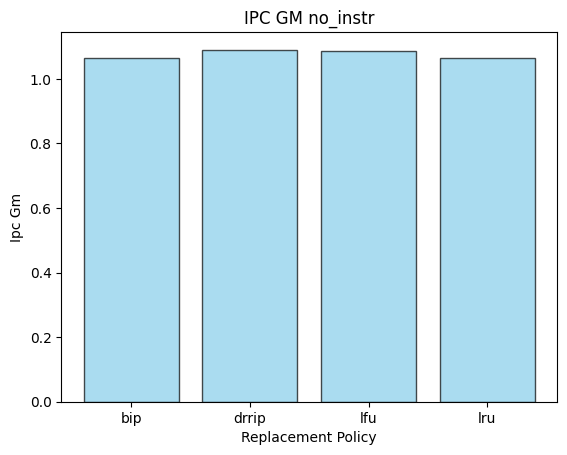

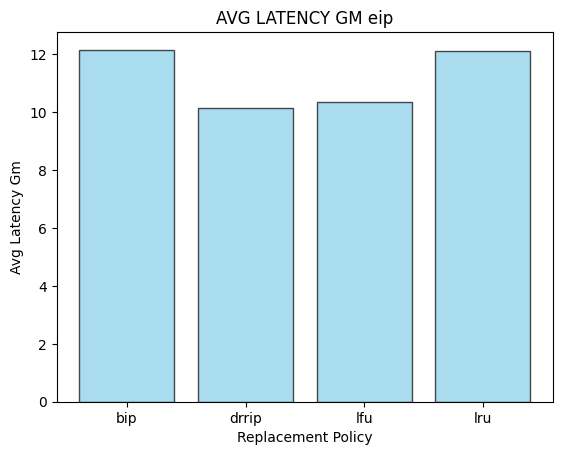

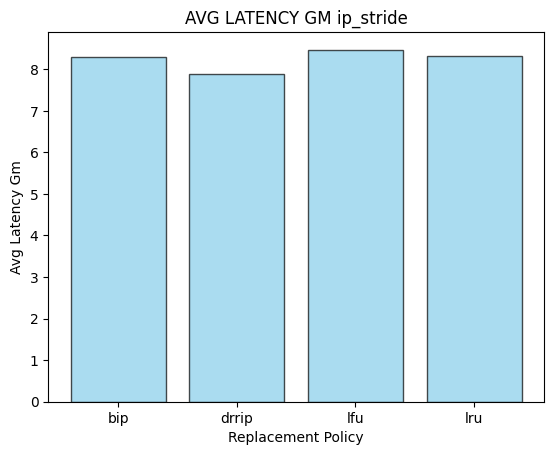

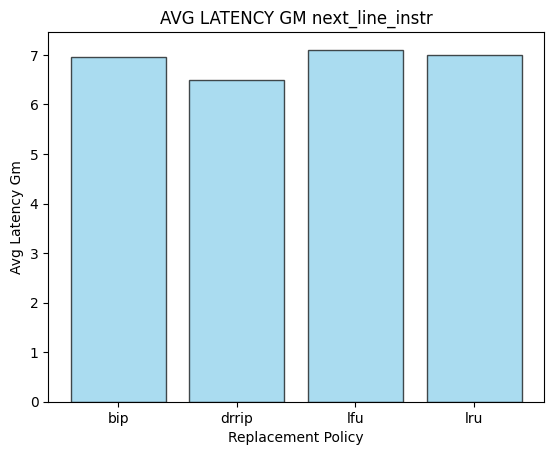

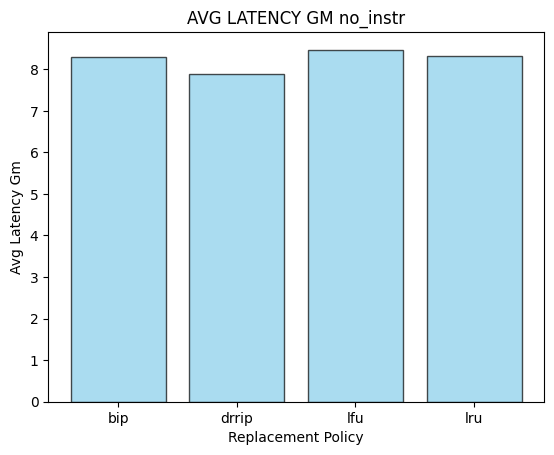

In [70]:
# plots for speedup_gm, ipc_gm, mpki_gm, avg_latency_gm
# we make 2d plots for all prefetchers with bar for each replacement policy

# Speedup
for pref in df_speedup_grouped_gm['prefetcher'].unique():
    data = df_speedup_grouped_gm[df_speedup_grouped_gm['prefetcher'] == pref]
    plot_2d_bar(data, "speedup_gm",title=f"SPEEDUP GM {pref}")

for pref in df_total_grouped_gm['prefetcher'].unique():
    data = df_total_grouped_gm[df_total_grouped_gm['prefetcher'] == pref]
    plot_2d_bar(data, "mpki",title=f"MPKI GM {pref}")

for pref in df_ipc_grouped_gm['prefetcher'].unique():
    data = df_ipc_grouped_gm[df_ipc_grouped_gm['prefetcher'] == pref]
    plot_2d_bar(data, "ipc_gm",title=f"IPC GM {pref}")

for pref in df_latency_grouped_gm['prefetcher'].unique():
    data = df_latency_grouped_gm[df_latency_grouped_gm['prefetcher'] == pref]
    plot_2d_bar(data, "avg_latency_gm",title=f"AVG LATENCY GM {pref}")

